In [47]:
import pandas as pd

In [48]:
currency_data=pd.read_csv("dataset.csv")


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode

In [50]:
currency_data

,Variance,Skewness,Kurtosis,Entropy,authentication
0,-1.397100,3.319100,-1.392700,-1.994800,0
1,0.390120,-0.142790,-0.031994,0.350840,0
2,-1.667700,-7.153500,7.892900,0.967650,0
3,-3.848300,-12.804700,15.682400,-1.281000,0
4,-3.568100,-8.213000,10.083000,0.967650,0
...,...,...,...,...,...
4727,3946.590202,3.532173,10.476248,9.248118,0
4728,4449.193279,3.258068,8.615009,9.377633,0
4729,4165.227084,3.407550,9.611394,9.306196,0
4730,4431.522585,3.267000,8.673286,9.373309,0


In [51]:
X=currency_data.drop('authentication',axis=1)
Y=currency_data['authentication']

In [52]:
print(X)

         Variance   Skewness   Kurtosis   Entropy
0       -1.397100   3.319100  -1.392700 -1.994800
1        0.390120  -0.142790  -0.031994  0.350840
2       -1.667700  -7.153500   7.892900  0.967650
3       -3.848300 -12.804700  15.682400 -1.281000
4       -3.568100  -8.213000  10.083000  0.967650
...           ...        ...        ...       ...
4727  3946.590202   3.532173  10.476248  9.248118
4728  4449.193279   3.258068   8.615009  9.377633
4729  4165.227084   3.407550   9.611394  9.306196
4730  4431.522585   3.267000   8.673286  9.373309
4731  3877.886575   3.573255  10.768154  9.229260

[4732 rows x 4 columns]


In [53]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4727    0
4728    0
4729    0
4730    0
4731    0
Name: authentication, Length: 4732, dtype: int64


In [54]:
def euclidean_distance(p1,p2):
    distance=np.sqrt(np.sum((p1-p2)**2))
    return distance

In [55]:
a=np.array([3,4])
b=np.array([5,9])
print(euclidean_distance(a,b))

5.385164807134504


In [56]:
def KNN(X_train,X_test, Y_train,Y_test,k_val):
    y_hat=[]
    for test_pt in X_test.to_numpy():
        distances=[]
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))
            
        distance_data = pd.DataFrame(data = distances,columns=['distance'], index=Y_train.index)
        
        k_neighbors_list = distance_data.sort_values(by=['distance'],axis=0)[:k_val]
        
        labels = Y_train.loc[k_neighbors_list.index]
        
        voting = mode(labels,keepdims=True).mode[0]
        
        y_hat.append(voting)
        
    return y_hat

In [58]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.3, random_state=49)
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val=10)

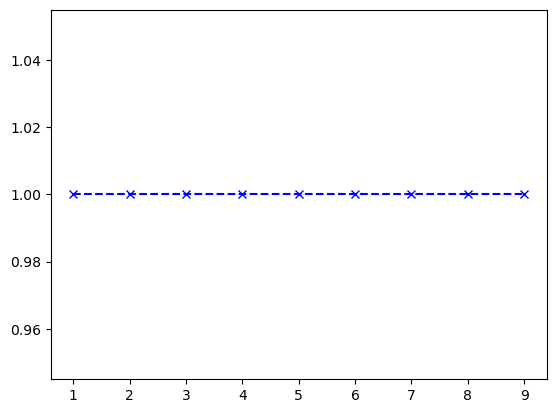

In [12]:
accuracy_vals = []
for i in range (1,10):
    y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val=i)
    accuracy_vals.append(accuracy_score(Y_test,y_hat_test))
    
plt.plot(range(1,10), accuracy_vals,color='blue',marker='x' ,linestyle='dashed')

In [59]:
print(accuracy_score(Y_test,y_hat_test))

0.9936619718309859


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=20) 
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val=5)

                                                                                                                           

KeyboardInterrupt: 

1.0


C:\Users\Ronald kilio\AppData\Local\Temp\ipykernel_34216\1439967151.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'KNN Results')

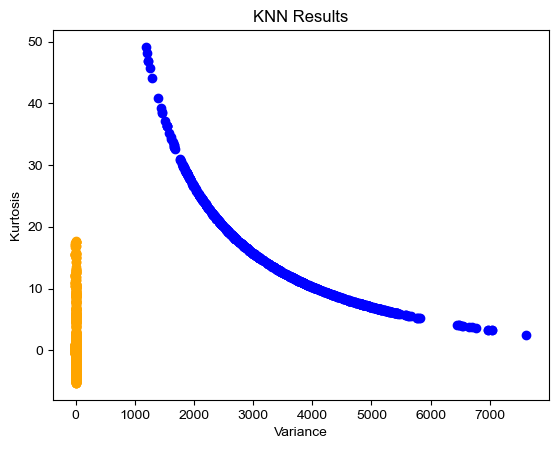

In [17]:
print(accuracy_score(Y_test,y_hat_test))
for i in range (len(y_hat_test)):
    if(y_hat_test[i]==0):
        plt.scatter(X_test.iloc[i]['Variance'],X_test.iloc[i]['Kurtosis'],color='blue')
    if(y_hat_test[i]==1):
        plt.scatter(X_test.iloc[i]['Variance'],X_test.iloc[i]['Kurtosis'],color='orange')
plt.style.use('seaborn')
plt.xlabel('Variance')
plt.ylabel('Kurtosis')
plt.title('KNN Results')

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cm=confusion_matrix(Y_test,y_hat_test)
print (cm)

[[703   9]
 [  0 708]]


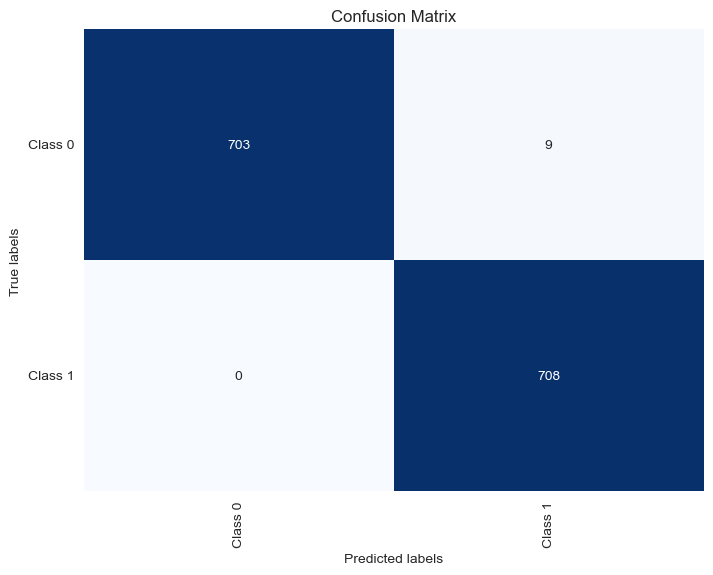

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm=confusion_matrix(Y_test,y_hat_test)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add class labels to the x and y axes
class_labels = ['Class 0', 'Class 1']  # Replace with your class labels
ax.xaxis.set_ticklabels(class_labels, rotation='vertical')
ax.yaxis.set_ticklabels(class_labels, rotation='horizontal')

# Show the plot
plt.show()

In [63]:
from sklearn.metrics import f1_score

In [64]:
f1_score=f1_score(Y_test,y_hat_test)
print (f1_score)

0.9936842105263157


In [65]:
from sklearn.metrics import precision_score

In [66]:
precision_score=precision_score(Y_test,y_hat_test)
print (precision_score)

0.9874476987447699


In [67]:
from sklearn.metrics import recall_score


In [68]:
recall_score=recall_score(Y_test,y_hat_test)
print (recall_score)

1.0


In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score=accuracy_score(Y_test,y_hat_test)
print (accuracy_score)

0.9936619718309859
